# **Atelier 3 Convolutional Neural Network (CNN)**

Nom et Prenon : Chaimaa Bouabd

# Tutoriel

## Import TensorFlow

In [43]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Download and prepare the CIFAR10 dataset

In [44]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## Verify the data

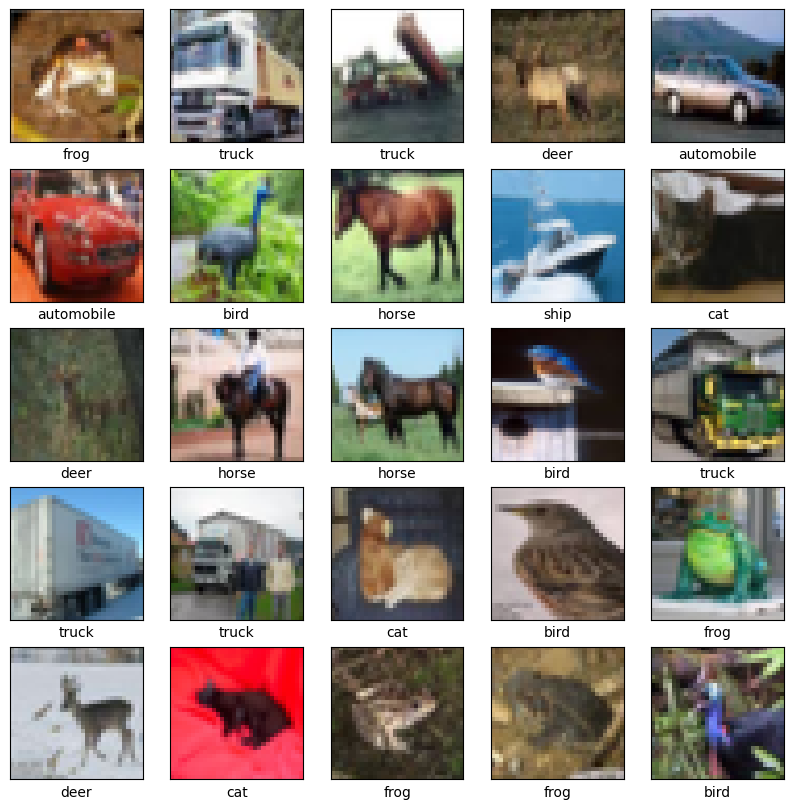

In [45]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Create the convolutional base

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_188 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_189 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_190 (Conv2D)         (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

## Add Dense layers on top

In [48]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_188 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_189 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_190 (Conv2D)         (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

## Compile and train the model

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history0 = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5449 - accuracy: 0.4359 - val_loss: 1.2905 - val_accuracy: 0.5369
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1743 - accuracy: 0.5831 - val_loss: 1.0742 - val_accuracy: 0.6211
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0260 - accuracy: 0.6411 - val_loss: 0.9943 - val_accuracy: 0.6534
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9341 - accuracy: 0.6757 - val_loss: 0.9453 - val_accuracy: 0.6729
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8600 - accuracy: 0.6991 - val_loss: 0.9495 - val_accuracy: 0.6751
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8097 - accuracy: 0.7163 - val_loss: 0.9351 - val_accuracy: 0.6727
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7624 - accuracy: 0.7361 - val_loss: 0.9068 - val_accur

## Evaluate the model

313/313 - 1s - loss: 0.8580 - accuracy: 0.7110 - 712ms/epoch - 2ms/step


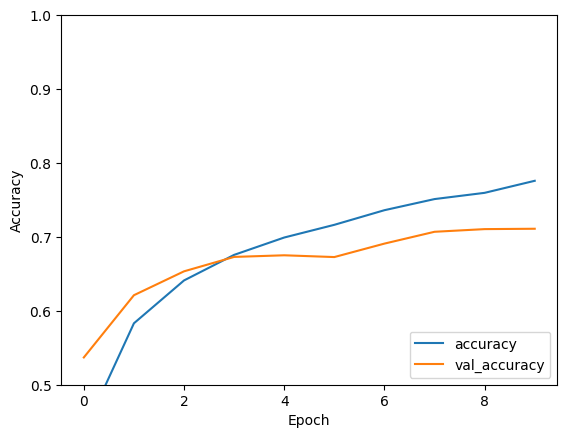

In [51]:
plt.plot(history0.history['accuracy'], label='accuracy')
plt.plot(history0.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [52]:
print(test_acc)

0.7110000252723694


# 2. Redimensionner les images de l'ensemble de données CIFAR-10 à la nouvelle dimension de 224 × 224, afin de les adapter à l'entrée des architectures populaires de CNN.

In [ ]:
import os
from tensorflow.keras.datasets import cifar10
import cv2

# Créer un dossier pour stocker les images redimensionnées
output_folder = 'cifar10_resized'
train_folder = os.path.join(output_folder, 'train')
test_folder = os.path.join(output_folder, 'test')

# Créer des sous-dossiers pour les ensembles d'entraînement et de test s'ils n'existent pas déjà
if not os.path.exists(train_folder):
    os.makedirs(train_folder)
for class_num in range(10):  # CIFAR-10 a 10 classes
    class_folder = os.path.join(train_folder, f'class_{class_num}')
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

if not os.path.exists(test_folder):
    os.makedirs(test_folder)
for class_num in range(10):  # CIFAR-10 a 10 classes
    class_folder = os.path.join(test_folder, f'class_{class_num}')
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

# Charger l'ensemble de données CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Définir la taille du batch pour le traitement des images
batch_size = 1  # Vous pouvez ajuster ce nombre selon la capacité de votre mémoire

# Redimensionner et enregistrer les images d'entraînement par classe
for class_num in range(10):
    class_indices = [i for i, label in enumerate(train_labels) if label[0] == class_num]
    class_folder = os.path.join(train_folder, f'class_{class_num}')
    for idx in class_indices:
        resized_img = cv2.resize(train_images[idx], (224, 224))
        cv2.imwrite(f'{class_folder}/train_{idx}.png', resized_img)

# Redimensionner et enregistrer les images de test par classe
for class_num in range(10):
    class_indices = [i for i, label in enumerate(test_labels) if label[0] == class_num]
    class_folder = os.path.join(test_folder, f'class_{class_num}')
    for idx in class_indices:
        resized_img = cv2.resize(test_images[idx], (224, 224))
        cv2.imwrite(f'{class_folder}/test_{idx}.png', resized_img)

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Définir la taille du batch pour le traitement des images
batch_size = 24  # Vous pouvez ajuster ce nombre selon la capacité de votre mémoire

# Utiliser ImageDataGenerator pour charger les données
datagen = ImageDataGenerator(rescale=1./255)

# Charger les données d'entraînement
train_generator = datagen.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Charger les données de test
test_generator = datagen.flow_from_directory(
    test_folder,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Vérifier les classes associées aux indices
print(train_generator.class_indices)

# Maintenant, vous pouvez utiliser train_generator et test_generator pour entraîner votre modèle.


Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
{'class_0': 0, 'class_1': 1, 'class_2': 2, 'class_3': 3, 'class_4': 4, 'class_5': 5, 'class_6': 6, 'class_7': 7, 'class_8': 8, 'class_9': 9}


# 3. Changer l'architecture CNN utilisée dans le tutoriel par l’une des architectures populaires( Inception, ResNet50), et ré-entraîner le modèle à partir de zéro (From scratch) avec SGD comme algorithme d’optimisation et un taux d'apprentissage initiale de 0.01.

# Inception

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10

# Charger l'architecture InceptionV3 sans les couches fully connected
base_model = InceptionV3(weights=None, include_top=False, input_shape=(224, 224, 3))

# Créer un modèle séquentiel et ajouter l'architecture InceptionV3
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compiler le modèle avec SGD comme optimiseur et un taux d'apprentissage de 0.01
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle à partir de zéro
history_InceptionV3 = model.fit(train_generator, epochs=10, batch_size=24, validation_data=test_generator)

Epoch 1/10
2084/2084 [==============================] - 466s 209ms/step - loss: 2.4923 - accuracy: 0.3259 - val_loss: 3.1621 - val_accuracy: 0.4678
Epoch 2/10
2084/2084 [==============================] - 423s 203ms/step - loss: 1.4510 - accuracy: 0.4975 - val_loss: 1.4068 - val_accuracy: 0.5589
Epoch 3/10
2084/2084 [==============================] - 422s 203ms/step - loss: 1.1956 - accuracy: 0.5865 - val_loss: 1.9991 - val_accuracy: 0.5966
Epoch 4/10
2084/2084 [==============================] - 422s 202ms/step - loss: 1.0191 - accuracy: 0.6502 - val_loss: 2.7928 - val_accuracy: 0.6339
Epoch 5/10
2084/2084 [==============================] - 422s 202ms/step - loss: 0.8675 - accuracy: 0.7025 - val_loss: 1.0053 - val_accuracy: 0.6904
Epoch 6/10
2084/2084 [==============================] - 422s 203ms/step - loss: 0.7342 - accuracy: 0.7452 - val_loss: 1.9276 - val_accuracy: 0.6963
Epoch 7/10
2084/2084 [==============================] - 422s 202ms/step - loss: 0.6148 - accuracy: 0.7846 - val_

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
model.save('/content/drive/My Drive/Inception_model.h5')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
accuracy_from_scratch = model.evaluate(test_generator)
#accuracy_transfer_learning = model_transfer_learning.evaluate(test_generator)

print("Précision du modèle à partir de zéro :", accuracy_from_scratch[1])
#print("Précision du modèle par transfert d'apprentissage :", accuracy_transfer_learning[1])


417/417 [==============================] - 36s 86ms/step - loss: 0.9145 - accuracy: 0.7470
Précision du modèle à partir de zéro : 0.746999979019165


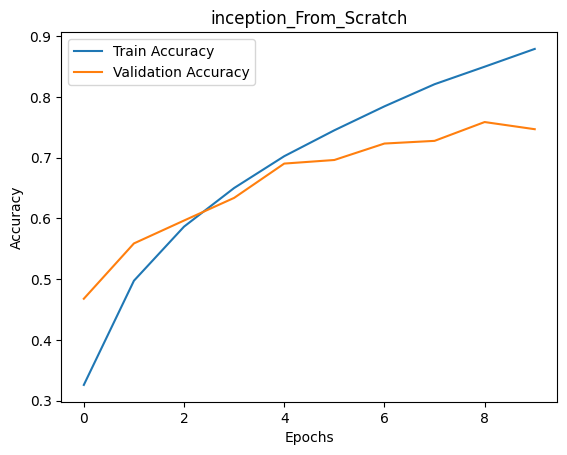

In [ ]:
import matplotlib.pyplot as plt

history = history_InceptionV3
# Comparer les précisions de chaque modèle
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("inception_From_Scratch")  # Utilisez le nom du modèle comme titre
plt.legend()
plt.show()


# ResNet :

In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
#from tensorflow.keras.utils import to_categorical

# Charger l'architecture ResNet50 sans les couches fully connected
base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))

# Créer un modèle séquentiel et ajouter l'architecture ResNet50
model_ResNet = Sequential()
model_ResNet.add(base_model)
model_ResNet.add(Flatten())
#model.add(Dense(512, activation='relu'))
model_ResNet.add(Dense(10, activation='softmax'))

# Compiler le modèle avec SGD comme optimiseur et un taux d'apprentissage de 0.01
model_ResNet.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle à partir de zéro
history_ResNet50 = model_ResNet.fit(train_generator, epochs=10, batch_size=36, validation_data=test_generator)


Epoch 1/10
2084/2084 [==============================] - 615s 286ms/step - loss: 3.8464 - accuracy: 0.3270 - val_loss: 1.5531 - val_accuracy: 0.4595
Epoch 2/10
2084/2084 [==============================] - 594s 285ms/step - loss: 1.5177 - accuracy: 0.4830 - val_loss: 1.9305 - val_accuracy: 0.5131
Epoch 3/10
2084/2084 [==============================] - 595s 285ms/step - loss: 1.2921 - accuracy: 0.5511 - val_loss: 2.0048 - val_accuracy: 0.5755
Epoch 4/10
2084/2084 [==============================] - 636s 305ms/step - loss: 1.1325 - accuracy: 0.6042 - val_loss: 1.7050 - val_accuracy: 0.5914
Epoch 5/10
2084/2084 [==============================] - 594s 285ms/step - loss: 0.9778 - accuracy: 0.6598 - val_loss: 1.5087 - val_accuracy: 0.6416
Epoch 6/10
2084/2084 [==============================] - 595s 286ms/step - loss: 0.8456 - accuracy: 0.7040 - val_loss: 1.2295 - val_accuracy: 0.6572
Epoch 7/10
2084/2084 [==============================] - 594s 285ms/step - loss: 0.7133 - accuracy: 0.7535 - val_

In [40]:
accuracy_from_scratch_ResNet = model_ResNet.evaluate(test_generator)
#accuracy_transfer_learning = model_transfer_learning.evaluate(test_generator)

print("Précision du modèle à partir de zéro ResNet :", accuracy_from_scratch_ResNet[1])
#print("Précision du modèle par transfert d'apprentissage :", accuracy_transfer_learning[1])


417/417 [==============================] - 39s 93ms/step - loss: 1.6308 - accuracy: 0.6626
Précision du modèle à partir de zéro ResNet : 0.6625999808311462


In [31]:

print("Précision du modèle à partir de zéro ResNet :", accuracy_from_scratch_ResNet[1])
#print("Précision du modèle par transfert d'apprentissage :", accuracy_transfer_learning[1])


Précision du modèle à partir de zéro ResNet : 0.6625999808311462


In [14]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
model.save('/content/drive/My Drive/ResNet50_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


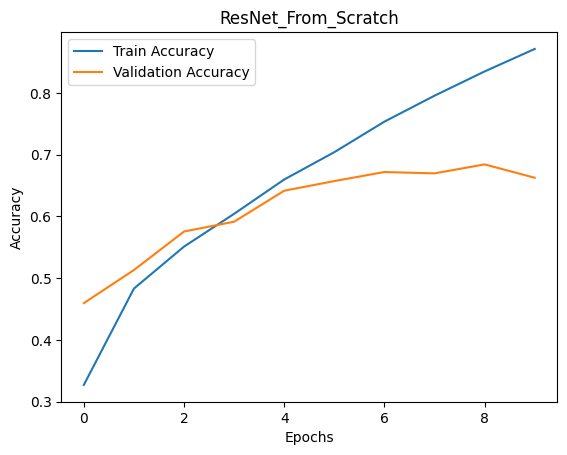

In [15]:
import matplotlib.pyplot as plt

history = history_ResNet50
# Comparer les précisions de chaque modèle
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("ResNet_From_Scratch")  # Utilisez le nom du modèle comme titre
plt.legend()
plt.show()


# 5. Ré-entraîner les modèles sur-mentionnés mais cette fois en utilisant la technique d'apprentissage par transfert (Transfer learning) sur ensemble de données ImageNet.

## Transfer Learning pour le modèle Inception

In [9]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Charger le modèle InceptionV3 pré-entraîné sur ImageNet sans les couches fully connected
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ajouter des couches fully connected personnalisées au modèle
x = GlobalAveragePooling2D()(base_model_inception.output)
#x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Créer le modèle final
model = Model(inputs=base_model_inception.input, outputs=predictions)

# Geler les couches du modèle InceptionV3 pour l'apprentissage par transfert
for layer in base_model_inception.layers:
    layer.trainable = False

# Compiler le modèle avec un taux d'apprentissage plus bas pour l'apprentissage par transfert
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle sur l'ensemble de données CIFAR-10 avec l'apprentissage par transfert
history_inception_TL = model.fit(train_generator, epochs=10,batch_size=24,  validation_data=test_generator)


87910968/87910968 [==============================] - 4s 0us/step
Epoch 1/10
2084/2084 [==============================] - 219s 102ms/step - loss: 2.0441 - accuracy: 0.6972 - val_loss: 1.6446 - val_accuracy: 0.7579
Epoch 2/10
2084/2084 [==============================] - 216s 103ms/step - loss: 2.0833 - accuracy: 0.7422 - val_loss: 2.2689 - val_accuracy: 0.7408
Epoch 3/10
2084/2084 [==============================] - 218s 104ms/step - loss: 2.0190 - accuracy: 0.7595 - val_loss: 2.7167 - val_accuracy: 0.7248
Epoch 4/10
2084/2084 [==============================] - 201s 96ms/step - loss: 2.0336 - accuracy: 0.7686 - val_loss: 2.6535 - val_accuracy: 0.7460
Epoch 5/10
2084/2084 [==============================] - 204s 98ms/step - loss: 2.0274 - accuracy: 0.7751 - val_loss: 3.1588 - val_accuracy: 0.7319
Epoch 6/10
2084/2084 [==============================] - 203s 98ms/step - loss: 1.9418 - accuracy: 0.7843 - val_loss: 2.7864 - val_accuracy: 0.7419
Epoch 7/10
2084/2084 [============================

In [12]:
accuracy_transfer_learning_Inception = model.evaluate(test_generator)

print("Précision du modèle Inception par transfert d'apprentissage :", accuracy_transfer_learning_Inception[1])


417/417 [==============================] - 35s 84ms/step - loss: 2.8027 - accuracy: 0.7639
Précision du modèle Inception par transfert d'apprentissage : 0.7638999819755554


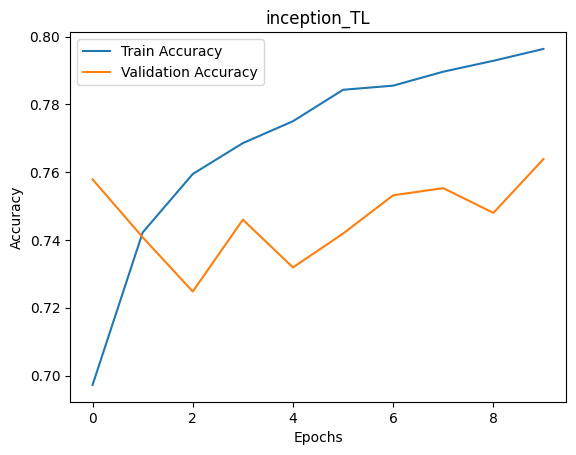

In [10]:
import matplotlib.pyplot as plt

history = history_inception_TL
# Comparer les précisions de chaque modèle
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("inception_TL")  # Utilisez le nom du modèle comme titre
plt.legend()
plt.show()


In [11]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
model.save('/content/drive/My Drive/Inception_TL_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Transfer Learning pour le modèle ResNet50

In [21]:
from tensorflow.keras.optimizers import Adam

# Charger le modèle ResNet50 pré-entraîné sur ImageNet sans les couches fully connected
base_model_RestNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ajouter des couches fully connected personnalisées au modèle
x = GlobalAveragePooling2D()(base_model_RestNet50.output)
predictions = Dense(10, activation='softmax')(x)

# Créer le modèle final
model_RestNet50 = Model(inputs=base_model_RestNet50.input, outputs=predictions)

# Geler les couches du modèle ResNet50 pour l'apprentissage par transfert
for layer in base_model_RestNet50.layers:
    layer.trainable = False

# Compiler le modèle avec un taux d'apprentissage plus bas pour l'apprentissage par transfert
model_RestNet50.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle sur l'ensemble de données CIFAR-10 avec l'apprentissage par transfert
history_resnet50_TL = model_RestNet50.fit(train_generator, epochs=10, batch_size=24,  validation_data=test_generator)


Epoch 1/10
2084/2084 [==============================] - 238s 113ms/step - loss: 2.2961 - accuracy: 0.1910 - val_loss: 2.2211 - val_accuracy: 0.2468
Epoch 2/10
2084/2084 [==============================] - 245s 117ms/step - loss: 2.1157 - accuracy: 0.2523 - val_loss: 1.9752 - val_accuracy: 0.3043
Epoch 3/10
2084/2084 [==============================] - 243s 116ms/step - loss: 2.0483 - accuracy: 0.2812 - val_loss: 1.8723 - val_accuracy: 0.3249
Epoch 4/10
2084/2084 [==============================] - 252s 121ms/step - loss: 1.9736 - accuracy: 0.3027 - val_loss: 2.1613 - val_accuracy: 0.2798
Epoch 5/10
2084/2084 [==============================] - 233s 112ms/step - loss: 1.9411 - accuracy: 0.3159 - val_loss: 1.8087 - val_accuracy: 0.3416
Epoch 6/10
2084/2084 [==============================] - 230s 110ms/step - loss: 1.9297 - accuracy: 0.3258 - val_loss: 1.7790 - val_accuracy: 0.3758
Epoch 7/10
2084/2084 [==============================] - 230s 111ms/step - loss: 1.8857 - accuracy: 0.3363 - val_

In [23]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
model.save('/content/drive/My Drive/ResNet50_TL_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
#accuracy_from_scratch = model.evaluate(test_generator)
accuracy_transfer_learning_ResNet50 = model_RestNet50.evaluate(test_generator)

#print("Précision du modèle à partir de zéro :", accuracy_from_scratch[1])
print("Précision du modèle ResNet par transfert d'apprentissage :", accuracy_transfer_learning_ResNet50[1])


417/417 [==============================] - 40s 95ms/step - loss: 1.8479 - accuracy: 0.3635
Précision du modèle ResNet par transfert d'apprentissage : 0.3634999990463257


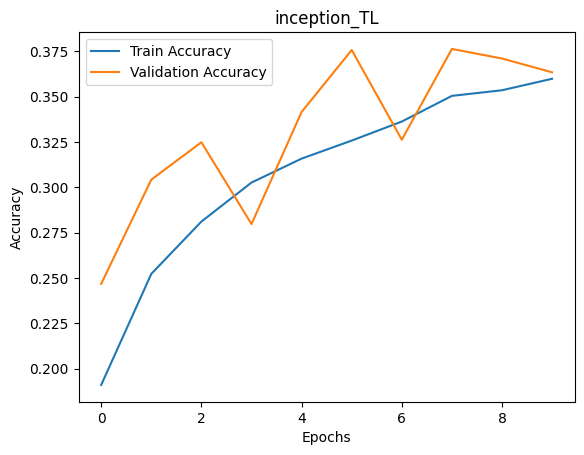

In [26]:
import matplotlib.pyplot as plt

history = history_resnet50_TL
# Comparer les précisions de chaque modèle
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("inception_TL")  # Utilisez le nom du modèle comme titre
plt.legend()
plt.show()


# 6. Comparer les résultats d'entraînement de ces modèles à partir de zéro avec ceux de l'apprentissage par transfert.

## Comparaison des Courbes d'Apprentissage Inception

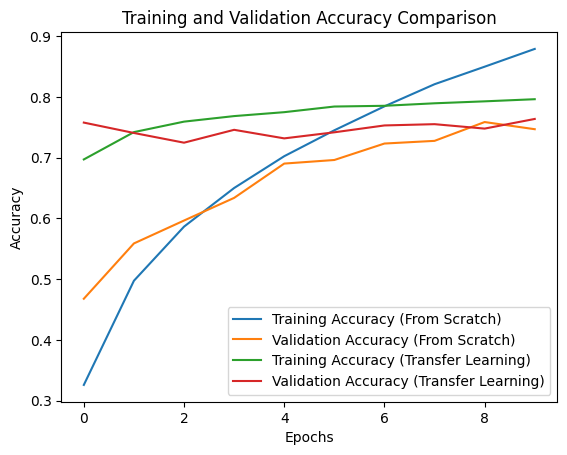

In [17]:
import matplotlib.pyplot as plt
history = history_InceptionV3
# Tracer les courbes d'apprentissage pour le modèle à partir de zéro
plt.plot(history.history['accuracy'], label='Training Accuracy (From Scratch)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (From Scratch)')
history_transfer = history_inception_TL
# Tracer les courbes d'apprentissage pour le modèle avec transfert d'apprentissage
plt.plot(history_transfer.history['accuracy'], label='Training Accuracy (Transfer Learning)')
plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy (Transfer Learning)')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Comparaison des Courbes d'Apprentissage ResNet50

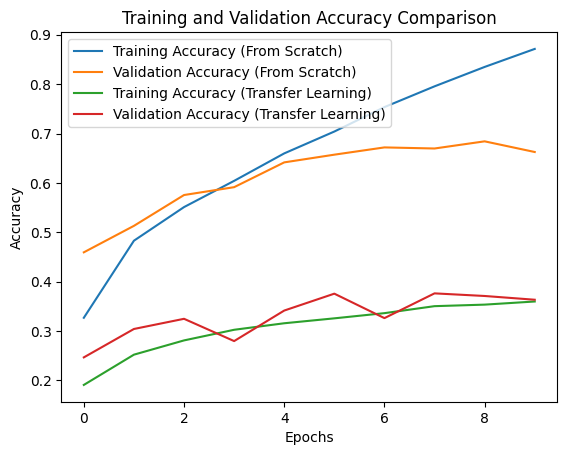

In [27]:
import matplotlib.pyplot as plt
history = history_ResNet50
# Tracer les courbes d'apprentissage pour le modèle à partir de zéro
plt.plot(history.history['accuracy'], label='Training Accuracy (From Scratch)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (From Scratch)')

history_transfer = history_resnet50_TL
# Tracer les courbes d'apprentissage pour le modèle avec transfert d'apprentissage
plt.plot(history_transfer.history['accuracy'], label='Training Accuracy (Transfer Learning)')
plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy (Transfer Learning)')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Comparaison des Performances Finales Inception

In [35]:
loss_from_scratch_Inception= 1.5143


In [41]:
##### Inception :

# Évaluation des performances finales sur l'ensemble de validation pour le modèle à partir de zéro
#loss_from_scratch_Inception=  accuracy_from_scratch[0]
accuracy_from_scratch_Inception = accuracy_from_scratch
# Évaluation des performances finales sur l'ensemble de validation pour le modèle avec transfert d'apprentissage
loss_transfer_Inception, accuracy_transfer_Inception = accuracy_transfer_learning_Inception

##### ResNet50:

# Évaluation des performances finales sur l'ensemble de validation pour le modèle à partir de zéro
loss_from_scratch_ResNet, accuracy_from_scratch_ResNet = accuracy_from_scratch_ResNet
# Évaluation des performances finales sur l'ensemble de validation pour le modèle avec transfert d'apprentissage
loss_transfer_ResNet, accuracy_transfer_ResNet = accuracy_transfer_learning_ResNet50

# Afficher les résultats pour Inception
print("Performance du modèle Inception à partir de zéro:")
print("Loss:", loss_from_scratch_Inception)
print("Accuracy:", accuracy_from_scratch_Inception)

print("\nPerformance du modèle Inception avec transfert d'apprentissage:")
print("Loss:", loss_transfer_Inception)
print("Accuracy:", accuracy_transfer_Inception)
print('         ')
# Afficher les résultats Pour ResNet50
print("Performance du modèle ResNet50 à partir de zéro:")
print("Loss:", loss_from_scratch_ResNet)
print("Accuracy:", accuracy_from_scratch_ResNet)

print("\nPerformance du modèle ResNet50 avec transfert d'apprentissage:")
print("Loss:", loss_transfer_ResNet)
print("Accuracy:", accuracy_transfer_ResNet)


Performance du modèle Inception à partir de zéro:
Loss: 1.5143
Accuracy: 0.746999979019165

Performance du modèle Inception avec transfert d'apprentissage:
Loss: 2.8027100563049316
Accuracy: 0.7638999819755554
         
Performance du modèle ResNet50 à partir de zéro:
Loss: 1.630769968032837
Accuracy: 0.6625999808311462

Performance du modèle ResNet50 avec transfert d'apprentissage:
Loss: 1.8479105234146118
Accuracy: 0.3634999990463257


**D'après ces résultats, l'architecture Inception est celle qui donne de bons résultats, avec une précision atteignant 76%.**

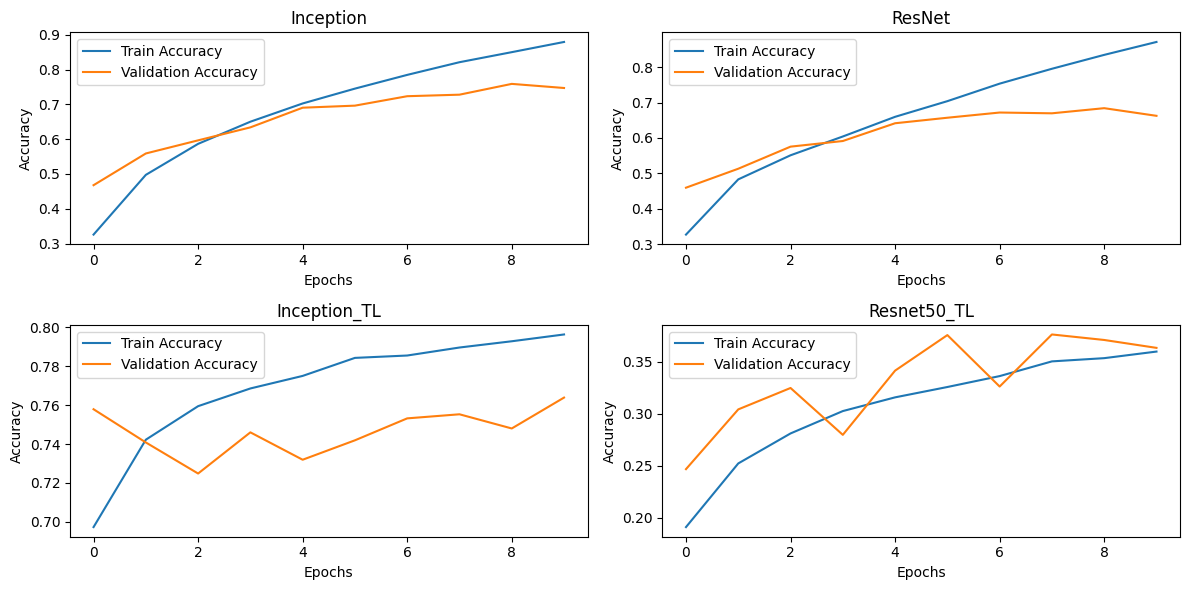

In [42]:
import matplotlib.pyplot as plt

# Liste des modèles et de leurs noms (pour légende)
models = [history_InceptionV3, history_ResNet50, history_inception_TL, history_resnet50_TL]
model_names = ['Inception', 'ResNet', 'Inception_TL', 'Resnet50_TL']

# Créer une nouvelle figure avec des sous-graphiques
plt.figure(figsize=(12, 6))

# Comparer les précisions de chaque modèle
for i, history in enumerate(models):
    plt.subplot(2, 2, i+1)  # 2 lignes, 2 colonnes, i+1 indique la position du sous-graphique
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(model_names[i])  # Utilisez le nom du modèle comme titre
    plt.legend()

plt.tight_layout()  # Ajuste automatiquement les espaces entre les sous-graphiques
plt.show()
